In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_csv("./data/advertising.csv")
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [5]:
df['total_spent'] = df['TV'] + df['radio'] + df['newspaper']
df

TV  radio  newspaper  sales  total_spent
0    230.1   37.8       69.2   22.1        337.1
1     44.5   39.3       45.1   10.4        128.9
2     17.2   45.9       69.3    9.3        132.4
3    151.5   41.3       58.5   18.5        251.3
4    180.8   10.8       58.4   12.9        250.0
..     ...    ...        ...    ...          ...
195   38.2    3.7       13.8    7.6         55.7
196   94.2    4.9        8.1    9.7        107.2
197  177.0    9.3        6.4   12.8        192.7
198  283.6   42.0       66.2   25.5        391.8
199  232.1    8.6        8.7   13.4        249.4

[200 rows x 5 columns]

In [10]:
X = df['total_spent']
y = df['sales']

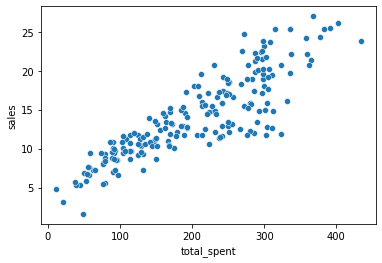

In [8]:
sns.scatterplot(data=df, x='total_spent', y='sales');

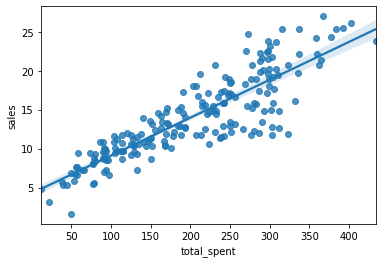

In [9]:
sns.regplot(data=df, x='total_spent', y='sales');

In [11]:
help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_like, shape (M,) or (M, K)
        y-coordinates of the sample points. Several data sets of sample
        points sharing the same x-coordinates can be fitted at once by
        passing in a 2D-array that contains one dataset per column.
    deg : int
        Degree of the fitting po

In [12]:
# we want to create a single line y = mx + b for our linear regression model
np.polyfit(X, y, deg=1)

# this function returns our two Beta coefficient values:
# y = B1*x + B0

array([0.04868788, 4.24302822])

In [13]:
spending = np.linspace(0, 500, 100)
predicted_sales = 0.04868788 * spending + 4.24302822

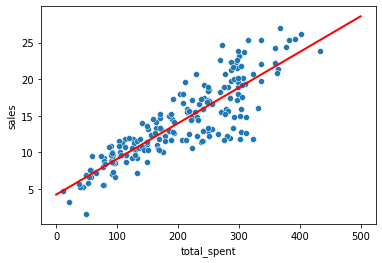

In [15]:
sns.scatterplot(data=df, x='total_spent', y='sales')
plt.plot(spending, predicted_sales, color='red', lw=2);

In [16]:
# predict a single value
spend = 200
sales = 0.04868788 * spend + 4.24302822
sales

13.98060422

In [17]:
np.polyfit(X, y, 3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [18]:
cubic_model = 3.07615033e-07 * spending ** 3 + -1.89392449e-04 * spending ** 2 + 8.20886302e-02 * spending + 2.70495053e+00

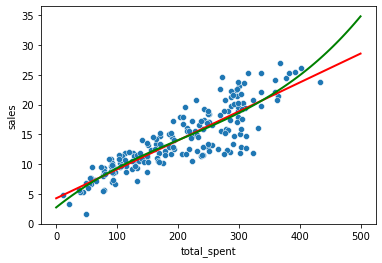

In [19]:
sns.scatterplot(data=df, x='total_spent', y='sales')
plt.plot(spending, predicted_sales, color='red', lw=2);
plt.plot(spending, cubic_model, color='green', lw=2);